# The aerodynamic center of a finite wing

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

The *pitching moment* acting on a wing moving through the air depends on the chosen *pole*, a point on the symmetry plane. Neglecting the drag, the aerodynamic action on the wing is given by the net lift applied at the pole *and* a separate net pitching moment about that point. For a generic choice of the pole the magnitude of the pitching moment varies with the lift, i.e. with the angle of attack. 

The *aerodynamic center* is that particular pole at which the pitching moment coefficient of the wing does not vary with lift coefficient, or the angle of attack.

##### Interlude — setup our Python tools first

In [71]:
# Set up the notebook and import required Python packages
%run ./src/aerodynamic_center_wing/init.py
%matplotlib inline

## DATCOM formula for $X_{\mathrm{ac,W}}$

For a finite wing we want to find an axis orthogonal to the wing's symmetry plane and passing through the point $P_{\mathrm{ac,W}}$ of coordinates $(X_{\mathrm{ac,W}},0,0)$. The coordinate $X_{\mathrm{ac,W}}$ is such that the pitching moment coefficient about $P_{\mathrm{ac,W}}$ does not vary with the angle of attack and the point is called the aerodynamic center of the wing.


The following figure gives the nomenclature of our problem.

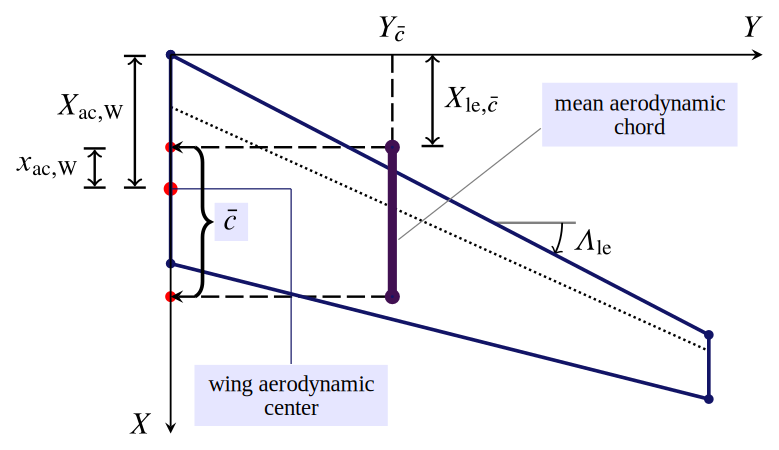

In [72]:
SVG(filename='./resources/Wing_Aerodynamic_Center_WEB.svg')

The distance of the aerodynamic center to the wing apex can be calculated with the following formula provided by the USAF DATCOM:

\begin{equation}
X_{\mathrm{ac,W}} = X_{\mathrm{le},\bar{c}} + K_1 \, \Big( \frac{X_{\mathrm{ac}}'}{c_{\mathrm{r}}} - K_2\Big)\,\bar{c}
\end{equation}

where $X_{\mathrm{le},\bar{c}}$ is the leading edge location, calculated as follows:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

of the mean aerodynamic chord

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y
\end{equation}

Similarly, the mean aerodynamic chord is also associated to a spanwise station

\begin{equation}
Y_{\bar{c}} = \frac{2}{S} \int_{0}^{b/2} y \, c(y) \, \mathrm{d}y
\end{equation}

The non-dimensional quantities $K_1$, $K_2$ and $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ are functions of wing's shape ($\lambda$, $\Lambda_{\mathrm{le}}$, $\mathrm{AR}$) and flight Mach number $M_{\infty}$. They have to be interpolated over tabulated data or can be read from a set of graphs.

# Functions $K_1$, $K_2$ and $X_{\mathrm{ac}}'/c_{\mathrm{r}}$

Let us now import the digitized data necessary to work out our numerical examples.

In [73]:
# %run ./src/aerodynamic_center_wing/init.py
database = import_database_aerodynamic_center()
# report_database_dimensions(database)

The plot representing $K_1$ as a function of taper ratio $\lambda$ is reported below.

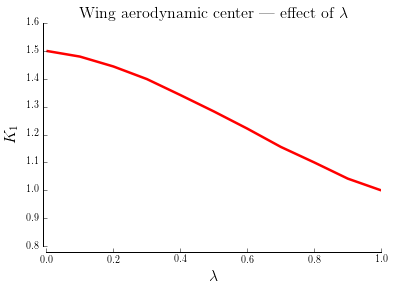

In [74]:
# %run ./src/aerodynamic_center_wing/init.py
plot_K1(database['var0_K1'], database['data_K1'])

The plots representing $K_2$ as a function of leading edge sweep angle $\Lambda_{\mathrm{le}}$, aspect ratio $\mathrm{AR}$, and taper ratio $\lambda$ are reported below.

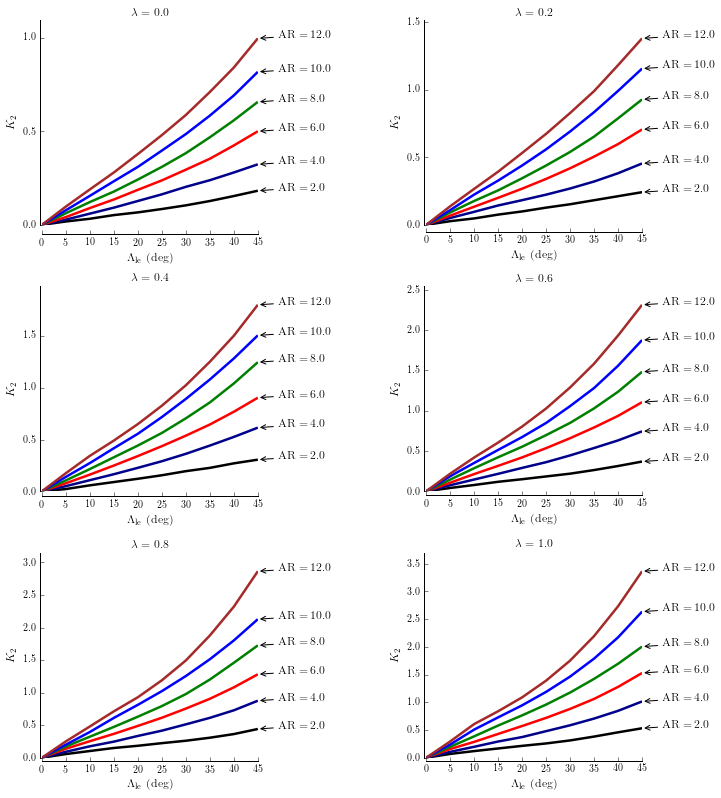

In [75]:
# %run ./src/aerodynamic_center_wing/init.py
multiplot_K2(database['var0_K2'], database['var1_K2'], database['var2_K2'], database['data_K2'])

The plots representing $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ as a function of $(\tan\Lambda_{\mathrm{le}} )/\sqrt{1-M^2}$, $\mathrm{AR}\tan\Lambda_{\mathrm{le}}$, and $\lambda$ are reported below.

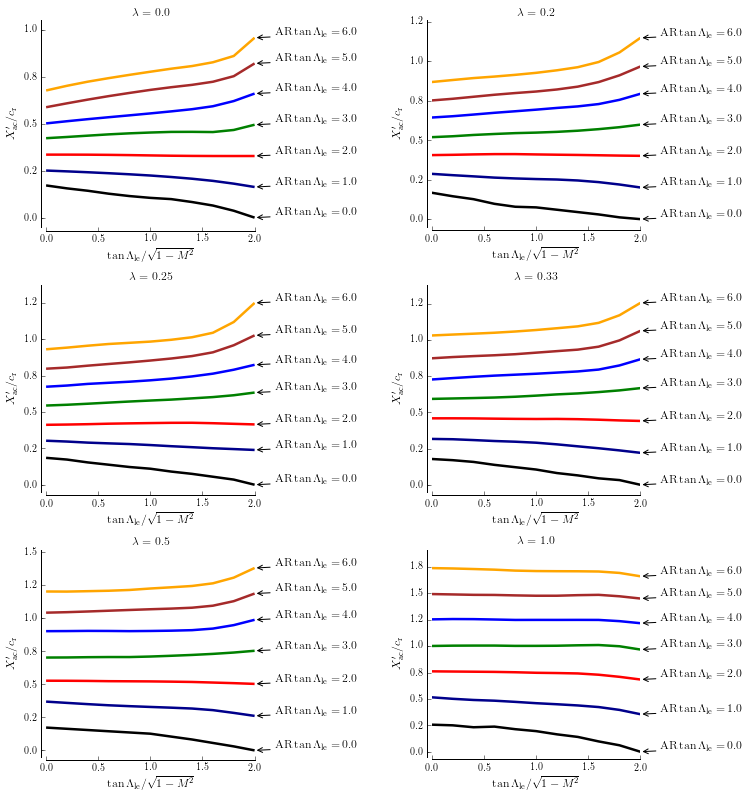

In [76]:
# %run ./src/aerodynamic_center_wing/init.py
multiplot_XacCr(database['var0_XacCr'], database['var1_XacCr'], database['var2_XacCr'], database['data_XacCr'])

# Numerical example

Let us now define a wing shape and calculate the aerodynamic center for a given flight condition.

## The wing

In [77]:
c_r = 4.0; c_t = 1.5; b = 27; Lambda_le = 25*math.pi/180

In [78]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{span,}\, b: & ' + r'{0}'.format(b) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep,}\, \Lambda_{\mathrm{le}}: &' 
    +    r'{0}'.format(Lambda_le*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

The planform of the assigned wing is the following:

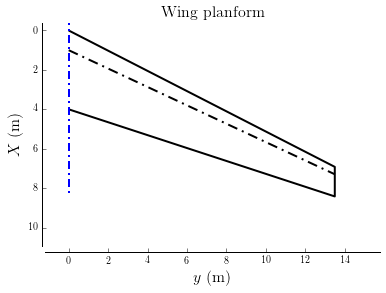

In [79]:
# %run ./src/aerodynamic_center_wing/init.py
plot_planform(c_r, c_t, b, Lambda_le)

The following wing geometric characteristics

\begin{equation}
S=( c_{\mathrm{r}} + c_{\mathrm{t}} )\,\frac{1}{2} b
\,,\qquad
\lambda = \frac{ c_{\mathrm{t}} }{ c_{\mathrm{r}} }
\,,\qquad
\text{AR} = \frac{ b^2 }{ S }
\end{equation}

become:

In [80]:
S_ref = (c_r + c_t)*b/2
taper_ratio = c_t/c_r
AR = b*b/S_ref
print("Taper ratio: {0}\nWing area: {1} m^2\nAspect ratio: {2}".format(taper_ratio, S_ref, AR))

Taper ratio: 0.375
Wing area: 74.25 m^2
Aspect ratio: 9.818181818181818


In [81]:
display(Math(r'\text{surface:}\quad S = '+ '{0:.4}'.format(S_ref) +'\,\mathrm{m}^2'))
display(Math(r'\text{taper ratio:}\quad \lambda = '+ '{0:.3}'.format(taper_ratio)))
display(Math(r'\text{aspect ratio:}\quad \text{AR} = '+ '{0:.4}'.format(AR)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The functions $c(y)$, $X_{\mathrm{le}}(y)$ are now determined.

The function $c(y)$ is the linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = A_c \, y + B_c
\end{equation}

with 

\begin{equation}
A_c = \frac{2}{b} \left( c_{\mathrm{t}} - c_{\mathrm{r}} \right)
  \;\;,\qquad 
  B_c = c_{\mathrm{r}}
\end{equation}

For the given wing this function becomes:

In [82]:
A_c = 2*(c_t - c_r)/b; B_c = c_r;
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

The function $X_{\mathrm{le}}(y)$ is the linear law that gives the leading edge distance to the $y$-axis of the wing section at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
X_{\mathrm{le}}(y) = A_{X_{\mathrm{le}}} \, y
\end{equation}

with 

\begin{equation}
A_{X_{\mathrm{le}}} = \tan \Lambda_{\mathrm{le}}
\end{equation}

For the given wing this function becomes:

In [83]:
A_xle = math.tan(Lambda_le);
display(Math(r'X_{\mathrm{le}}(y) =\,' + '{0:.3}'.format(A_xle) + '\,y'))

<IPython.core.display.Math object>

## Position of the mean aerodynamic chord

We can calculate now the leading edge $X_{\mathrm{le},\bar{c}}$ of the mean aerodynamic chord with respect to the apex of the wing.

In [84]:
# %run ./src/aerodynamic_center_wing/init.py
# symbolic variable
y = Symbol('y')
# indefinite integrals
c_mac_law_integral_indefinite =  integrate( (A_c*y + B_c)*(A_c*y + B_c),y )
X_le_mac_law_integral_indefinite = integrate( (A_xle*y)*(A_c*y + B_c), y )
Y_mac_law_integral_indefinite = integrate( y*(A_c*y + B_c), y )
print('Indefinite integral of c^2(y): ' + str(c_mac_law_integral_indefinite))
print('Indefinite integral of X_le(y)*c(y): ' + str(X_le_mac_law_integral_indefinite))
print('Indefinite integral of y*c(y): ' + str(Y_mac_law_integral_indefinite))
# definite integrals
c_mac =  (2/S_ref)*integrate( (A_c*y + B_c)*(A_c*y + B_c),(y,0,b/2) )
X_le_mac = (2/S_ref)*integrate( (A_xle*y)*(A_c*y + B_c),(y,0,b/2) )
Y_mac =  (2/S_ref)*integrate( y*(A_c*y + B_c),(y,0,b/2) )
print('mac = ' + '{0} m'.format(c_mac))
print('X_le_mac = ' + '{0} m'.format(X_le_mac))
print('Y_mac = ' + '{0} m'.format(Y_mac))

Indefinite integral of c^2(y): 0.0114311842706904*y**3 - 0.740740740740741*y**2 + 16.0*y
Indefinite integral of X_le(y)*c(y): -0.0287844233429011*y**3 + 0.932615316309997*y**2
Indefinite integral of y*c(y): -0.0617283950617284*y**3 + 2.0*y**2
mac = 2.93939393939394 m
X_le_mac = 2.67067113306954 m
Y_mac = 5.72727272727273 m


The $\bar{c}$ calculation workflow is the following:

In [85]:
display_workflow_c_mac(S_ref, b, A_c, B_c, c_mac_law_integral_indefinite, c_mac)

<IPython.core.display.Latex object>

The $X_{\mathrm{le},\bar{c}}$ calculation workflow is the following:

In [86]:
display_workflow_X_le_mac(S_ref, b, A_c, B_c, A_xle, X_le_mac_law_integral_indefinite, X_le_mac)

<IPython.core.display.Latex object>

The $Y_{\bar{c}}$ calculation workflow is the following:

In [87]:
display_workflow_Y_mac(S_ref, b, A_c, B_c, Y_mac_law_integral_indefinite, Y_mac)

<IPython.core.display.Latex object>

Now the quantities $K_1$, $K_2$ and $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ will be calculated for an assigned flight Mach number.

## Flight condition

The position of wing's aerodynamic center depends on the flight Mach number $M$. Wi want to calculate such a point for a

In [88]:
Mach = 0.70

## Calculate $K_1$

We calculate $K_1$ by one-dimensional interpolation.

In [89]:
# K1
var0_K1 = database['var0_K1']
data_K1 = database['data_K1']
g_K1 = interp1d(var0_K1, data_K1)
K1 = g_K1(taper_ratio)
print('lambda = {0}\n\t --> K_1 = {1}'.format(taper_ratio,K1))

lambda = 0.375
	 --> K_1 = 1.356042508573083


This is how the value of $K_1$ is taken from the curve:

lambda = 0.375 --> K_1 = 1.356042508573083


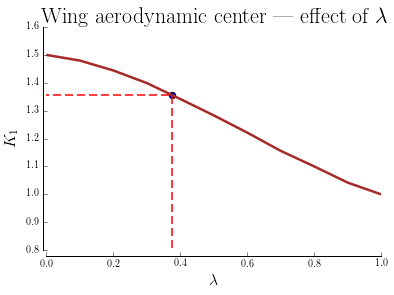

In [90]:
# %run ./src/aerodynamic_center_wing/init.py
plot_interpolate_K1(database['var0_K1'], database['data_K1'],taper_ratio)

## Calculate $K_2$

We calculate $K_2$ by two-dimensional interpolation over $(\Lambda_{\mathrm{le}},\mathrm{AR})$ and successively by one-dimensional interpolation over $\lambda$.

In [91]:
# K2
var0_K2 = database['var0_K2']
var1_K2 = database['var1_K2']
var2_K2 = database['var2_K2']
data_K2 = database['data_K2']
# bracketing lambda
j_lambda = 1
g_K2_a = interp2d(var1_K2, var2_K2, data_K2[:,:,j_lambda], kind='linear')
K2_a = g_K2_a(AR, Lambda_le*180/math.pi)
K2_a = K2_a[0]
print('Lambda_LE = {0:.3} deg, AR = {1:.3}, lambda = {2:.3}\n\t --> K_2 = {3}'.format(
        Lambda_le*180/math.pi, AR, 
        var0_K2[j_lambda], K2_a))

Lambda_LE = 25.0 deg, AR = 9.82, lambda = 0.2
	 --> K_2 = 0.5486688261682336


This is how a first value of $K_2$ is taken from a first family of curves:

Lambda_LE = 25.0 deg, AR = 9.818181818181818 --> K_2 = 0.5486688261682336


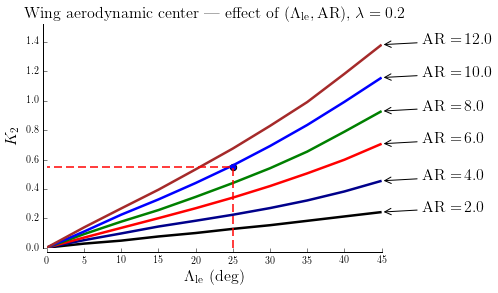

In [92]:
# %run ./src/aerodynamic_center_wing/init.py
plot_interpolate_K2(database['var0_K2'], database['var1_K2'], database['var2_K2'], database['data_K2'], 
                    1, # j_lambda
                    Lambda_le*180/math.pi, # Lambda_le 
                    AR) # AR

In [93]:
# bracketing lambda
j_lambda = 2
g_K2_b = interp2d(var1_K2, var2_K2, data_K2[:,:,j_lambda], kind='linear')
K2_b = g_K2_b(AR, Lambda_le*180/math.pi)
K2_b = K2_b[0]
print('Lambda_LE = {0:.3} deg, AR = {1:.3}, lambda = {2:.3}\n\t --> K_2 = {3}'.format(
        Lambda_le*180/math.pi, AR, 
        var0_K2[j_lambda], K2_b))

Lambda_LE = 25.0 deg, AR = 9.82, lambda = 0.4
	 --> K_2 = 0.7028841972351074


This is how a second value of $K_2$ is taken from a second family of curves:

Lambda_LE = 25.0 deg, AR = 9.818181818181818 --> K_2 = 0.7028841972351074


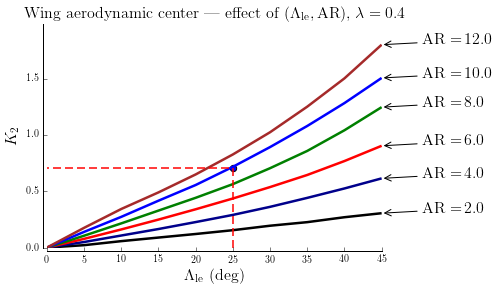

In [94]:
# %run ./src/aerodynamic_center_wing/init.py
plot_interpolate_K2(database['var0_K2'], database['var1_K2'], database['var2_K2'], database['data_K2'], 
                    2, # j_lambda
                    Lambda_le*180/math.pi, # Lambda_le 
                    AR) # AR

This is how the final value of $K_2$ is calulated by one-dimensional interpolation over $\lambda$ based on the previously calculated couple of values:

In [95]:
ja = 1; jb = 2
K2 = K2_a + (taper_ratio - var0_K2[ja])*(K2_b - K2_a)/(var0_K2[jb] - var0_K2[ja])
print('K_2 = {0}'.format(K2))

K_2 = 0.6836072715430206


In [96]:
display_workflow_K2(var0_K2[ja], var0_K2[jb], K2_a, K2_b, taper_ratio, K2)

<IPython.core.display.Latex object>

## Calculate $X_{\mathrm{ac}}'/c_{\mathrm{r}}$

Similarly, we calculate $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ by two-dimensional interpolation over $(\tan\Lambda_{\mathrm{le}}/\sqrt{1 - M^2},\mathrm{AR}\tan\Lambda_{\mathrm{le}})$ and successively by one-dimensional interpolation over $\lambda$.

In [97]:
# Xac' / c_r
var0_XacCr = database['var0_XacCr']
var1_XacCr = database['var1_XacCr']
var2_XacCr = database['var2_XacCr']
data_XacCr = database['data_XacCr']
# bracketing lambda
j_lambda = 3
g_XacCr_a = interp2d(var1_XacCr, var2_XacCr, data_XacCr[:,:,j_lambda], kind='linear')
y_ = AR*math.tan(Lambda_le)
x_ = math.tan(Lambda_le)/math.sqrt(1 - math.pow(Mach,2))
XacCr_a = g_XacCr_a(y_, x_)
XacCr_a = XacCr_a[0]
print('Lambda_LE = {0:.3} deg, AR = {1:.3}, Mach = {2:.3}, lambda = {2:.3}'.format(
        Lambda_le*180/math.pi, AR, Mach, var0_XacCr[j_lambda]))
print('x_1 = tan(Lambda_LE)/sqrt(1-M^2) = {0}\nx_2 = AR*tan(Lambda_LE) = {1}\n\t --> Xac\'/c_r = {2}'
    .format(x_, y_, XacCr_a))

Lambda_LE = 25.0 deg, AR = 9.82, Mach = 0.7, lambda = 0.7
x_1 = tan(Lambda_LE)/sqrt(1-M^2) = 0.6529613267441859
x_2 = AR*tan(Lambda_LE) = 4.57829337097635
	 --> Xac'/c_r = 0.8374249451418523


This is how a first value of $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ is taken from a first family of curves:

x_1 = tan(Lambda_LE)/sqrt(1-M^2) = 0.6529613267441859
x_2 = AR*tan(Lambda_LE) = 4.57829337097635
 --> Xac'/c_r = 0.8374249451418523


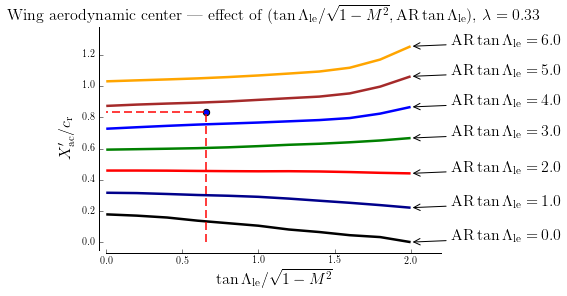

In [98]:
# %run ./src/aerodynamic_center_wing/init.py
plot_interpolate_XacCr(
    database['var0_XacCr'], database['var1_XacCr'], database['var2_XacCr'], database['data_XacCr'], 
    3, # j_lambda
    Lambda_le*180/math.pi, # Lambda_le (deg) 
    AR, # AR 
    Mach) # Mach

In [99]:
# bracketing lambda
j_lambda = 4
g_XacCr_b = interp2d(var1_XacCr, var2_XacCr, data_XacCr[:,:,j_lambda], kind='linear')
y_ = AR*math.tan(Lambda_le)
x_ = math.tan(Lambda_le)/math.sqrt(1 - math.pow(Mach,2))
XacCr_b = g_XacCr_b(y_, x_)
XacCr_b = XacCr_b[0]
print('Lambda_LE = {0:.3} deg, AR = {1:.3}, Mach = {2:.3}, lambda = {2:.3}'.format(
        Lambda_le*180/math.pi, AR, Mach, var0_XacCr[j_lambda]))
print('x_1 = tan(Lambda_LE)/sqrt(1-M^2) = {0}\nx_2 = AR*tan(Lambda_LE) = {1}\n\t --> Xac\'/c_r = {2}'
    .format(x_, y_, XacCr_b))


Lambda_LE = 25.0 deg, AR = 9.82, Mach = 0.7, lambda = 0.7
x_1 = tan(Lambda_LE)/sqrt(1-M^2) = 0.6529613267441859
x_2 = AR*tan(Lambda_LE) = 4.57829337097635
	 --> Xac'/c_r = 0.9943689072495803


This is how a second value of $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ is taken from a second family of curves:

x_1 = tan(Lambda_LE)/sqrt(1-M^2) = 0.6529613267441859
x_2 = AR*tan(Lambda_LE) = 4.57829337097635
 --> Xac'/c_r = 0.9943689072495803


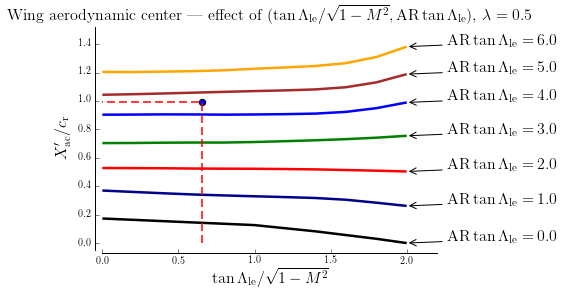

In [100]:
# %run ./src/aerodynamic_center_wing/init.py
plot_interpolate_XacCr(
    database['var0_XacCr'], database['var1_XacCr'], database['var2_XacCr'], database['data_XacCr'], 
    4, # j_lambda
    Lambda_le*180/math.pi, # Lambda_le (deg) 
    AR, # AR 
    Mach) # Mach

This is how the final value of $X_{\mathrm{ac}}'/c_{\mathrm{r}}$ is calulated by one-dimensional interpolation over $\lambda$ based on the previously calculated couple of values:

In [101]:
ja = 3; jb = 4
XacCr = XacCr_a + (taper_ratio - var0_XacCr[ja])*(XacCr_b - XacCr_a)/(var0_XacCr[jb] - var0_XacCr[ja])
print('Xac\'/c_r = {0}'.format(XacCr))

Xac'/c_r = 0.8789689262101187


In [102]:
display_workflow_XacCr(var0_XacCr[ja], var0_XacCr[jb], XacCr_a, XacCr_b, taper_ratio, XacCr)

<IPython.core.display.Latex object>

## Calculate $X_{\mathrm{ac,W}}$

Finally, we calculate the $X_{\mathrm{ac,W}}$ according to the DATCOM formula.

In [103]:
xbar_ac = K1*(XacCr - K2)
X_ac = X_le_mac + xbar_ac*c_mac
print('x_ac / mac = {0}'.format(xbar_ac))
print('X_ac = {0} m'.format(X_ac))

x_ac / mac = 0.26491870827376
X_ac = 3.44937157860150 m


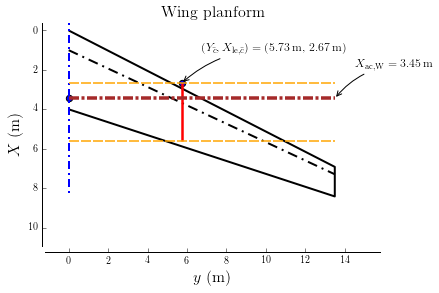

In [104]:
# %run ./src/aerodynamic_center_wing/init.py
plot_planform(c_r, c_t, b, Lambda_le, mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac, X_ac=X_ac)